In [1]:
import sqlite3
import sqlite3
import pandas as pd
%matplotlib inline
mydb= '../sqlStart/Abstracts_DB.db'


In [2]:
def getTotalPD():
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT * FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        print df.shape
        
    return df

In [3]:
y = getTotalPD()
y.columns

(1548, 7)


Index([u'Abstract', u'Author affiliation', u'Authors', u'Conf', u'Title',
       u'terms', u'year'],
      dtype='object')

In [4]:
#-*- coding: utf-8 -*-
import sys, os, logging
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


''' createHplots.py:
    Creates from command line a hdf5 file of the following key:values.
    sys.argv[1] = list of the files to create individual Hplots, and a final giant pd.
    
    'files' : Pandas Series of list of successfully parsed files
    'errors' : Pandas Series of list of failed parsed files
    'dfs' : Concatenated Pandas Dataframe of successfully parsed dataframes from files
'''

def createDF(filename):
    rxn = filename.strip("cwd").strip(".csv")
    data_frame = pd.read_csv(filename)
    
    data_frame['rxn'] = rxn
    data_frame.dropna(inplace = True) 
    
    return data_frame

def createHist(data_frame, columns, outfile):
    plt.figure(figsize = (40,20))
    sns.set_palette('GnBu_d')
    sns.set_context("paper",font_scale=2)
    sns.set_style("white")
    fdict = {'fontsize': 16,'fontweight' : 4}
    legend = []
    for i,c in enumerate(columns):
        querydf = 'rxn == "%s"'%c
        y = data_frame.query(querydf)[['score']]
        
        ax = sns.distplot(y.dropna(), hist=True, rug=False, kde=True,
            );
        legend.append(c)



    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    ax.set_xlabel('Probability', fontdict = {'fontsize': 32,'fontweight' : 5})
    ax.set_ylabel('Frequency', fontdict = {'fontsize': 32,'fontweight' : 5}) 
    ax.set_title('AMPK ', fontdict =  {'fontsize': 36,'fontweight' : 10})
    ax.legend(legend, fontsize = 'xx-large') 
    
    plt.savefig(outfile)
    return ax

def createHist1(data_frame, columns, outfile):
    plt.figure(figsize = (40,20))
    sns.set_palette('GnBu_d')
    sns.set_context("paper",font_scale=2)
    sns.set_style("white")
    fdict = {'fontsize': 16,'fontweight' : 4}
    legend = []
    for i,c in enumerate(columns): 
        ax = sns.distplot(data_frame[c].dropna(), hist=True, rug=False, kde=False,
            );
        legend.append(c)



    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    ax.set_xlabel('Probability', fontdict = {'fontsize': 32,'fontweight' : 5})
    ax.set_ylabel('Count', fontdict = {'fontsize': 32,'fontweight' : 5}) 
    ax.set_title('AMPK ', fontdict =  {'fontsize': 36,'fontweight' : 10})
    ax.legend(legend, fontsize = 'xx-large') 
    
    plt.savefig(outfile)
    return ax


In [5]:
df = pd.DataFrame(y[["Conf",'year']])

In [6]:
import matplotlib.pyplot as plt
def getPie(start = getTotalPD()):
    df = pd.DataFrame(start[["Conf", "year"]])
    keys = list(df['Conf'].unique())
    figures = {}
    

    figures['TOTAL'] = df.groupby(['Conf'])["Conf"].count().plot(kind = 'pie', colormap = 'ocean', 
                                                subplots = True)    
    for i, conference in enumerate(keys):
        figures[conference] = df.query('Conf == "%s"' % conference).groupby('year').count().plot(kind = 'pie',
                                                                                                 colormap = 'ocean',
                                                                                                 title = conference,
                                                                                                 subplots = True, 
                                                                                                 legend = False)
                                                    
                                                                          
    
    return figures


(1548, 7)


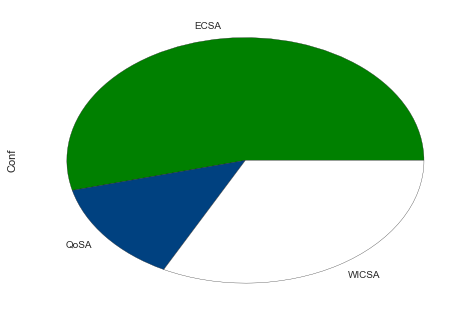

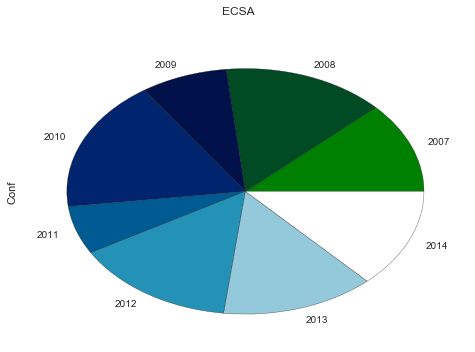

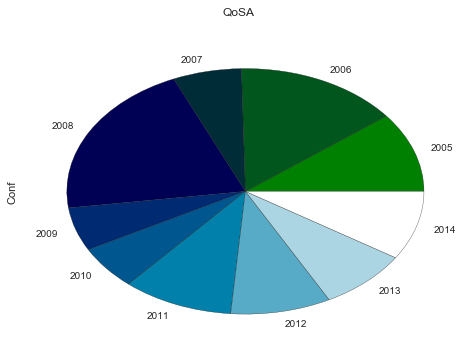

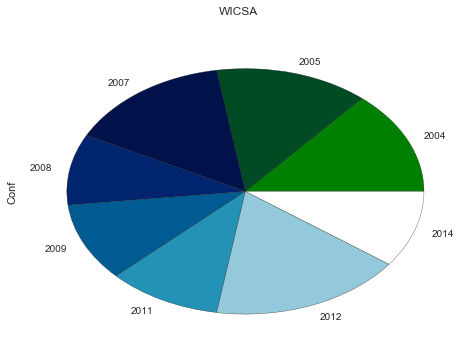

In [7]:
figures = getPie()

In [7]:
df = pd.DataFrame(y[["Conf", "year"]])
df['Conf'].unique()

array([u'ECSA', u'QoSA', u'WICSA'], dtype=object)

In [107]:
def group(start = getTotalPD()):
    dfs = {}
    bars = {}
    df = pd.DataFrame(start[["Conf", "year"]])
    confs = list(df['Conf'].unique())
    dfs['TOTAL'] = dict(data = df.groupby(['Conf'])["Conf"].count().to_dict())
    for i,conference in enumerate(confs):
       
        
        subDF = df.query('Conf == "%s"' % conference).groupby('year').count()
        plt.figure()
        #ax2 = subDF.plot(kind = 'pie', colormap = 'ocean',title = conference,subplots = True,legend = False)
        
        subDF.reset_index(inplace = True)
        
        dfs[conference] = subDF
        
        #plt.figure(2)
        ax = sns.barplot(x = subDF['year'], y = subDF['Conf'])
        fig = ax
        f = conference + 'test.png'
        plt.savefig(f)
    
        
        
        bars[conference] = fig
        #plt.cla()                                                     
    return dfs, bars

(1548, 7)


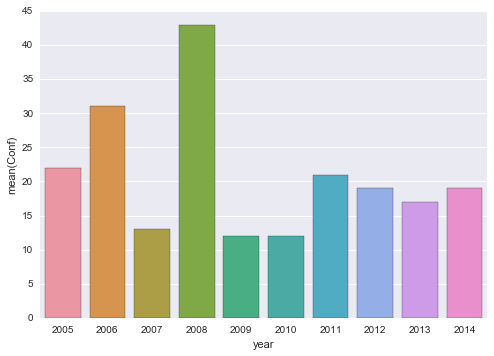

In [9]:

dfone = pd.DataFrame(y[["Conf", "year"]].query('Conf == "QoSA"'))
x = dfone.groupby('year').count()
x.reset_index(inplace=True)
sns.barplot(x = x['year'], y = x['Conf'])


In [65]:
def createBar(data):
    plt.figure(figsize = (40,20))
    bars = []
    sns.set_palette('GnBu_d')
    sns.set_context("paper",font_scale=2)
    sns.set_style("white")
    fdict = {'fontsize': 16,'fontweight' : 4}
    legend = []
    for i,c in data.iteritems():
        try:
            
            ax = sns.barplot(x = c['year'], y = c['Conf'])
        

            ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
            ax.set_axisbelow(True)
            ax.set_xlabel('Probability', fontdict = {'fontsize': 32,'fontweight' : 5})
            ax.set_ylabel('Frequency', fontdict = {'fontsize': 32,'fontweight' : 5}) 
            ax.set_title('AMPK ', fontdict =  {'fontsize': 36,'fontweight' : 10})
            ax.legend(i, fontsize = 'xx-large') 
            fig = ax
            bars.append(fig)
            plt.cla()
        except:
            pass
    
    return bars

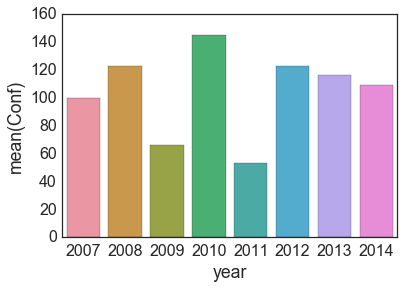

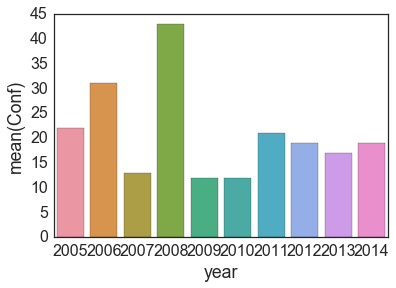

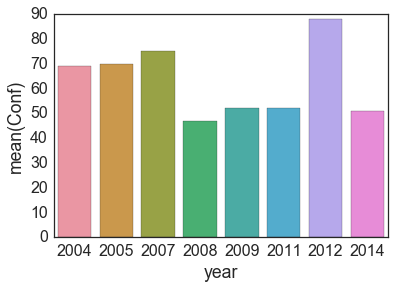

In [108]:
import matplotlib.pyplot as plt

%matplotlib inline


t, b = group()

In [74]:
def subplot(data, fig=None, index=111):
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(index)
    ax.plot(data)
i
plt.show()

In [43]:
fig.save('hi.png')

AttributeError: 'AxesSubplot' object has no attribute 'save'

In [11]:
with sqlite3.connect(mydb) as con:
    
    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    mytables = (cursor.fetchall())
    myt = []
    
    for x in mytables[1:]:
        table_entry = {}
        table_name = x[0]
        table_entry['name'] = table_name
        table_entry['html'] = str('http://127.0.0.1:5000/totals/%s' % table_name)
        table_entry['count'] = cursor.execute("SELECT COUNT(*) FROM %s"%table_name).fetchone()[0]
        
        myt.append(table_entry)
        print len(myt)
    y = dict(data = myt)

1
2
3
4
5
6
7
8
9
10
11


In [12]:

def to_csv():
    db = sqlite3.connect('database.db')
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from %s" % table_name, db)
        table.to_csv(table_name + '.csv', index_label='index')

In [ ]:
db = sqlite3.connect(mydb)
#table = pd.read_sql_query("SELECT * from CONFERENCES", db)
table.to_csv('CONFERENCES' + '.csv', index_label='index')



In [ ]:
len(myt)

In [ ]:
myt['PAPER']['html']

In [ ]:
y

In [11]:
pip install plotly
plotly.__version__

SyntaxError: invalid syntax (<ipython-input-11-36981b19db23>, line 1)

In [12]:
@app.route('/images/<cropzonekey>')
def images(cropzonekey):
    return render_template("images.html", title=cropzonekey)

@app.route('/fig/<cropzonekey>')
def fig(cropzonekey):
    fig = draw_polygons(cropzonekey)
    img = StringIO()
    fig.savefig(img)
    img.seek(0)
    return send_file(img, mimetype='image/png')
Your images.html template the becomes:

<html>
  <head>
    <title>{{ title }} - image</title>
  </head>
  <body>
    <img src="{{ url_for('fig', cropzonekey = title) }}" alt="Image Placeholder" height="100">
  </body>
</html>

SyntaxError: invalid syntax (<ipython-input-12-9135910c7ee6>, line 12)